<a href="https://colab.research.google.com/github/ImAli0/ImAli/blob/main/week6_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np 
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

In [ ]:
# Importing the dataset
# url https:www.kaggle.com/zalando-research/fashionmnist
# kaggle datasets download -d zalando-research/fashionmnist

img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]
#looking at the shape of the file
print(img_database.shape)


total_num_images = (img_database.shape[0])

(60000, 784)


In [ ]:
n_input = 784 #Input image is of size 28 x 28
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784  #Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

In [ ]:
# Weight and Bias definations of Neural Network

Weight_NN = {"W1": tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2": tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3": tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4": tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5": tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))
             }
Bias_NN = { "B1": tf.Variable(tf.random_normal([hidden_layer_1])),
            "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
            "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
            "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
            "B5": tf.Variable(tf.random_normal([output_layer]))
           }

In [ ]:
# Creating a computational graph

# Neural Network
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B2"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)

In [ ]:
# Implementing Neural network model using Tensorflow api

Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


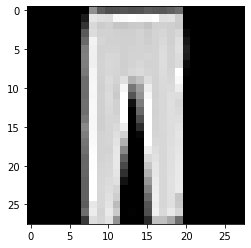

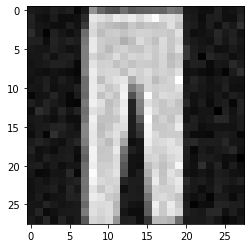

In [ ]:
# Dataset preparation

# Shuffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalize the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10* np.random.normal(0,1, size = X_train.shape)

#Original image
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()

#Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()

In [ ]:
#Define the metrics

# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# Initialize the Session

sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss:', loss)

# pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# run it though the autoencoder
denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

Epoch 0 / 100 loss: 4490.94
Epoch 1 / 100 loss: 3922.4373
Epoch 2 / 100 loss: 3720.1858
Epoch 3 / 100 loss: 3685.904
Epoch 4 / 100 loss: 3618.9653
Epoch 5 / 100 loss: 3544.5913
Epoch 6 / 100 loss: 3523.6384
Epoch 7 / 100 loss: 3452.008
Epoch 8 / 100 loss: 3393.102
Epoch 9 / 100 loss: 3389.0068
Epoch 10 / 100 loss: 3379.4543
Epoch 11 / 100 loss: 3348.28
Epoch 12 / 100 loss: 3295.8665
Epoch 13 / 100 loss: 3344.5586
Epoch 14 / 100 loss: 3286.9673
Epoch 15 / 100 loss: 3314.8203
Epoch 16 / 100 loss: 3296.5564
Epoch 17 / 100 loss: 3281.4658
Epoch 18 / 100 loss: 3274.15
Epoch 19 / 100 loss: 3253.187
Epoch 20 / 100 loss: 3268.1274
Epoch 21 / 100 loss: 3290.1423
Epoch 22 / 100 loss: 3245.0054
Epoch 23 / 100 loss: 3267.8171
Epoch 24 / 100 loss: 3302.2368
Epoch 25 / 100 loss: 3214.4167
Epoch 26 / 100 loss: 3255.4983
Epoch 27 / 100 loss: 3226.4897
Epoch 28 / 100 loss: 3235.4058
Epoch 29 / 100 loss: 3219.996
Epoch 30 / 100 loss: 3238.9817
Epoch 31 / 100 loss: 3175.8499
Epoch 32 / 100 loss: 3176.895

Epoch 0 / 100 loss: nan
Epoch 1 / 100 loss: nan
Epoch 2 / 100 loss: nan
Epoch 3 / 100 loss: nan
Epoch 4 / 100 loss: nan
Epoch 5 / 100 loss: nan
Epoch 6 / 100 loss: nan
Epoch 7 / 100 loss: nan
Epoch 8 / 100 loss: nan
Epoch 9 / 100 loss: nan
Epoch 10 / 100 loss: nan
Epoch 11 / 100 loss: nan
Epoch 12 / 100 loss: nan
Epoch 13 / 100 loss: nan
Epoch 14 / 100 loss: nan
Epoch 15 / 100 loss: nan
Epoch 16 / 100 loss: nan
Epoch 17 / 100 loss: nan
Epoch 18 / 100 loss: nan
Epoch 19 / 100 loss: nan
Epoch 20 / 100 loss: nan
Epoch 21 / 100 loss: nan
Epoch 22 / 100 loss: nan
Epoch 23 / 100 loss: nan
Epoch 24 / 100 loss: nan
Epoch 25 / 100 loss: nan
Epoch 26 / 100 loss: nan
Epoch 27 / 100 loss: nan
Epoch 28 / 100 loss: nan
Epoch 29 / 100 loss: nan
Epoch 30 / 100 loss: nan
Epoch 31 / 100 loss: nan
Epoch 32 / 100 loss: nan
Epoch 33 / 100 loss: nan
Epoch 34 / 100 loss: nan
Epoch 35 / 100 loss: nan
Epoch 36 / 100 loss: nan
Epoch 37 / 100 loss: nan
Epoch 38 / 100 loss: nan
Epoch 39 / 100 loss: nan
Epoch 40 /

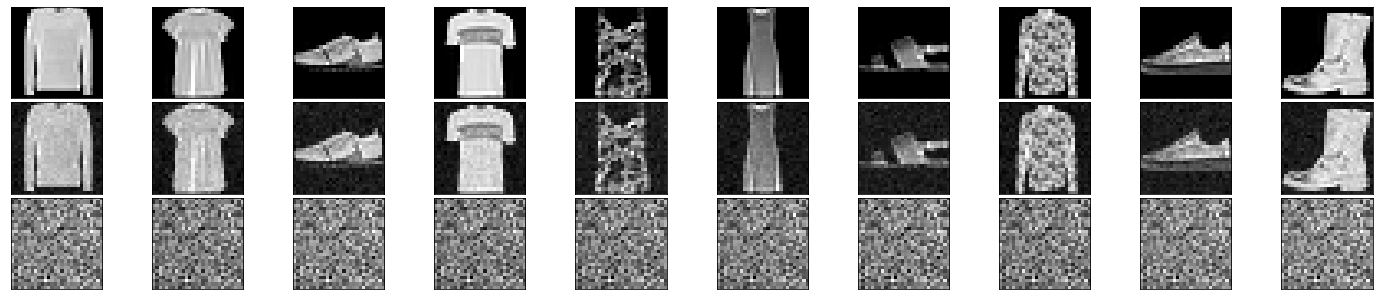

In [ ]:
# Another way of running session

X_actual = X_train[20:30]
noisy_image = X_train_noisy[20:30]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
      X_epoch = X_train[ i*batch_size : (i*1)*batch_size ]
      X_noise_epoch = X_train_noisy[i*batch_size : (i*1)*batch_size ]
      _, loss = sess.run([optimizer, computed_loss], feed_dict={X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)
  denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

#pick any image
  

# print the original image 
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape((28,28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)
  